In [1]:
# Importing the required libraries

import numpy as no
import pandas as pd

In [2]:
# Read the necessary file or upload it into python environment

data=pd.read_csv("data.csv")

In [7]:
# Displays the number of rows, columns and what are the columns present

data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [ ]:
# Therefore, in the given dataset, there are 2227 rows and 3 columns are present.

In [4]:
# Identifying the missing values

missing_data=data.isnull().sum()
missing_data

x1    5
x2    3
y     0
dtype: int64

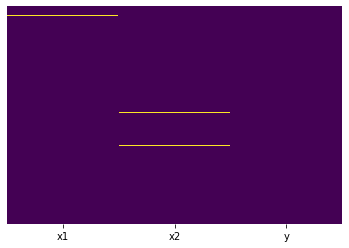

In [11]:
#Visual representation of the missing values

import seaborn as sns

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
# It is observed that out of 2227 rows present in the dataset, only '5' values of 'x1' & '3' values of 'x2' are missing. 
# Hence, they are considered to be negligible and the missing values can be dropped.

In [14]:
#The missing values rows can be dropped off as they are negligible using 'dropna' command.

data=data.dropna()

In [15]:
#Now, if we check for missing values,

missing_data1=data.isnull().sum()
missing_data1

x1    0
x2    0
y     0
dtype: int64

In [16]:
#Type of variables:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


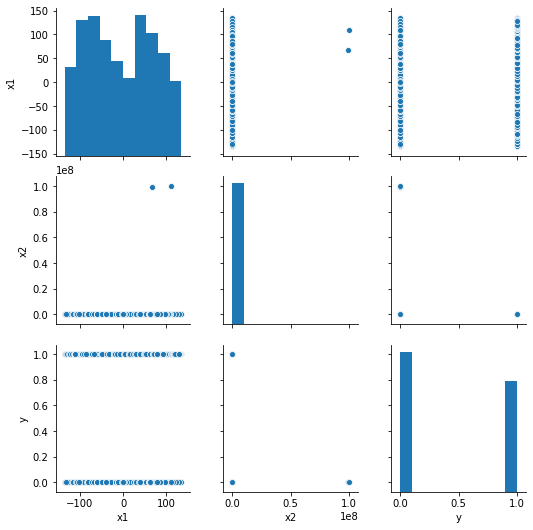

In [17]:
# All the variables are of numerical type.

#Pairwise relationships

import seaborn as sns
sns.pairplot(data)

In [18]:
#Pairwise relationship between continous variables

corr=data.corr()
corr

,x1,x2,y
x1,1.000000,0.037288,-0.120871
x2,0.037288,1.000000,-0.026735
y,-0.120871,-0.026735,1.000000


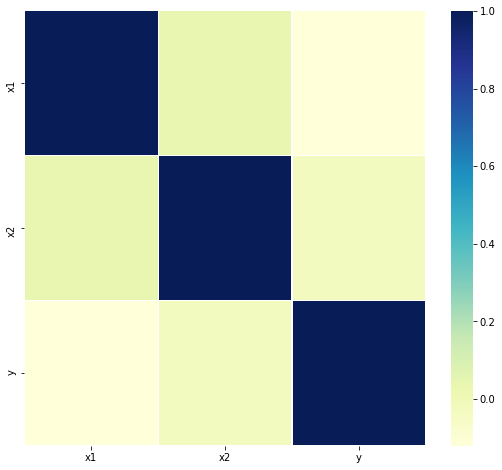

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [ ]:
#From the plot, we can observe that there is no much correlation between any two variables.

In [23]:
#Checking for outliers

data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
90%,97.633331,9.927624e+01,1.000000
95%,113.027748,1.137850e+02,1.000000
99%,128.120693,1.291919e+02,1.000000


In [68]:
#Preparation of data

X = data.iloc[:, :-1].values  
y = data.iloc[:, 2].values

In [69]:
#Divided the data into attributes(input) and output variables

X.shape,y.shape

((2219, 2), (2219,))

In [70]:
#Training the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
#Defining the model

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier(random_state=1234)#max_depth = 8, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [74]:
#Predict the labels for test data

predictions=dt.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [75]:
#Comparing actual vs predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
661,0,0
662,0,1
663,0,0
664,0,0


In [76]:
#Check for the accuracy

print('Training Score')
print(dt.score(X_train, y_train))

print('Test Score')
print(dt.score(X_test, y_test))

Training Score
1.0
Test Score
0.9174174174174174


In [77]:
#Evaluating the model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.08258258258258258
MSE: 0.08258258258258258
RMSE: 0.2873718541934519


In [79]:
#metrics

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9174174174174174

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[329,  31],
       [ 24, 282]], dtype=int64)

[Text(192.81397804054055, 209.07692307692307, 'X[0] <= -58.005\nentropy = 0.491\nsamples = 1553\nvalue = [878, 675]'),
 Text(145.48530405405407, 192.35076923076923, 'X[1] <= -26.508\nentropy = 0.497\nsamples = 494\nvalue = [229, 265]'),
 Text(140.96097972972973, 175.62461538461537, 'entropy = 0.0\nsamples = 229\nvalue = [229, 0]'),
 Text(150.00962837837838, 175.62461538461537, 'entropy = 0.0\nsamples = 265\nvalue = [0, 265]'),
 Text(240.14265202702705, 192.35076923076923, 'X[1] <= 16.175\nentropy = 0.475\nsamples = 1059\nvalue = [649, 410]'),
 Text(159.05827702702703, 175.62461538461537, 'X[0] <= 3.655\nentropy = 0.487\nsamples = 602\nvalue = [253, 349]'),
 Text(87.09324324324325, 158.89846153846153, 'X[1] <= -28.987\nentropy = 0.389\nsamples = 276\nvalue = [203, 73]'),
 Text(45.24324324324325, 142.1723076923077, 'X[0] <= -13.329\nentropy = 0.165\nsamples = 198\nvalue = [180, 18]'),
 Text(22.621621621621625, 125.44615384615385, 'X[1] <= -40.224\nentropy = 0.08\nsamples = 167\nvalue = [

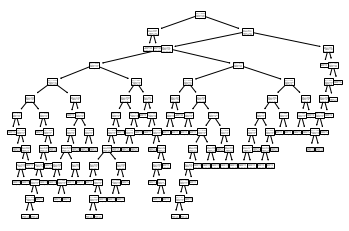

In [78]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(dt)

In [83]:
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, predictions)
print(class_rep_tree)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       360
           1       0.90      0.92      0.91       306

    accuracy                           0.92       666
   macro avg       0.92      0.92      0.92       666
weighted avg       0.92      0.92      0.92       666



In [ ]:
##Although our tree's performance is decent, it's a bad idea to immediately assume that 
#it's therefore the perfect tool for this job -- there's always the possibility of other models that will perform even better!

In [84]:
#Compare our decision tree to a logistic regression

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(X_train, y_train)
pred_labels_logit = logreg.predict(X_test)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, predictions)
class_rep_log = classification_report(y_test, predictions)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Decision Tree: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       360
           1       0.90      0.92      0.91       306

    accuracy                           0.92       666
   macro avg       0.92      0.92      0.92       666
weighted avg       0.92      0.92      0.92       666

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       360
           1       0.90      0.92      0.91       306

    accuracy                           0.92       666
   macro avg       0.92      0.92      0.92       666
weighted avg       0.92      0.92      0.92       666



In [86]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,cross_val_predict

# Set up our K-fold cross-validation
kf = StratifiedKFold(n_splits=10,)

decision_tree = DecisionTreeClassifier()
logistic_reg = LogisticRegression(max_iter=100)

# Train our models using KFold cv
dtree_score = cross_val_score(decision_tree,X_train,y_train, cv = kf,scoring='roc_auc')
lr_score = cross_val_score(logistic_reg,X_train,y_train, cv = kf,scoring='roc_auc')

# Print the mean of each array of scores
print("Decision Tree:", np.mean(dtree_score),"Logistic Regression:", np.mean(lr_score))

Decision Tree: 0.9409908495050103 Logistic Regression: 0.5715217362385931


C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number o

#After applying both Decision tree classifier and logistic regression, it is found that data could not be we,ll trained by logistic regression and so is accuracy 57%

But from decision tree, it is 92% of accuracy